In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2020.deeplearning/master/init.py
from init import init; init(force_download=False)

In [2]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.0.0'

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from IPython.display import Image


%matplotlib inline

## Lab vanishing gradient


In this lab you will impement a complete exploration and results visualization for the following experiment configurations  with dense neural networks:

- with the following numbers of layers [2,3,4,5,6,7,8,9,10]
- with the following neurons per layer [3,5,10,30]
- with activations ReLU, Sigmoid and LeakyReLU

In total, you must train and test 36 network architectures for each activation function.

The experimentation must be done with the MNIST Digits datasets (1500 items) using a random partition of 50/50 for train and test.

For each configuration you must record the **accuracy in test** and the **time used to train** the model.

Then, you will need to build the following visualizations

- one heat map for each activation function illustrating the **accuracy in test** for each configuration
- one heat map for each activation function illustrating the **time used to train** for each configuration
- a scatter plot of all your experiments, showing:
    - the time used to train in the x-axis
    - the accuracy in test in the y-axis
    - the number of layers as the size of the dots
    - expetiments for each activation function in different colors   
- a bar plot showing the average performance of each activation function for each number of layers.




Your visualizations must look similar to these ones:


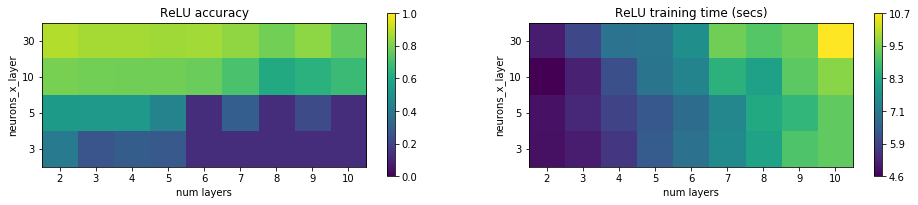

In [3]:
Image(filename='local/imgs/lab_vanishing_01.png')

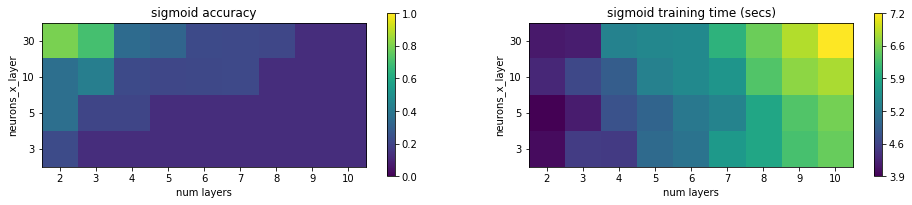

In [4]:
Image(filename='local/imgs/lab_vanishing_02.png')

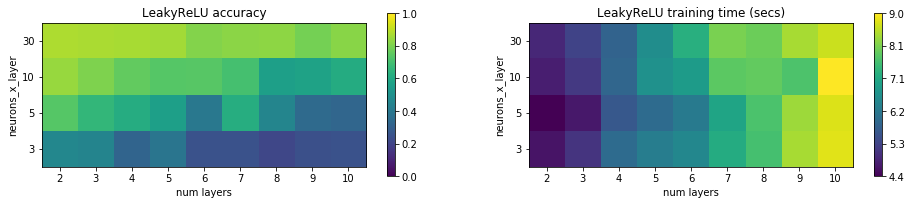

In [5]:
Image(filename='local/imgs/lab_vanishing_03.png')

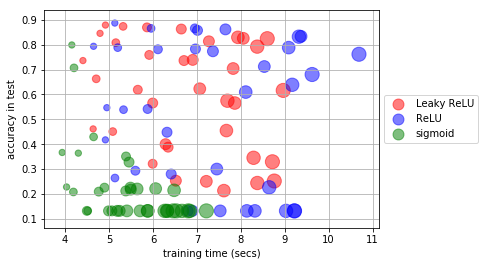

In [6]:
Image(filename='local/imgs/lab_vanishing_04.png')

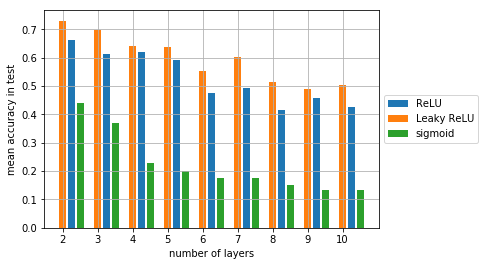

In [7]:
Image(filename='local/imgs/lab_vanishing_05.png')

### load sample MNIST data as customary

In [9]:
mnist = pd.read_csv("local/data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print ("dimension de las imagenes y las clases", X.shape, y.shape)

dimension de las imagenes y las clases (1500, 784) (1500,)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)
X_train = X_train
X_test  = X_test
y_train_oh = np.eye(10)[y_train]
y_test_oh  = np.eye(10)[y_test]
print (X_train.shape, y_train_oh.shape)

(750, 784) (750, 10)


In [12]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, concatenate, Input
from tensorflow.keras.backend import clear_session
from tensorflow import keras
import tensorflow as tf

### A basic multi layered dense model

observe that the function allows us to parametrize the number of hidden layers and their activation function


In [13]:
def get_model(input_dim=784, output_dim=10, num_hidden_layers=6, hidden_size=10, activation="relu"):

    clear_session()
    model = Sequential()
    model.add(Dense(hidden_size, activation=activation, input_dim=input_dim, name="Layer_%02d_Input"%(0)))
    
    for i in range(num_hidden_layers):
        model.add(Dense(hidden_size, activation=activation, name="Layer_%02d_Hidden"%(i+1)))
   
    model.add(Dense(output_dim, activation="softmax", name="Layer_%02d_Output"%(num_hidden_layers+1)))
        
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.reset_states()
    return model

In [25]:
from time import time
def experiment(activation, r=None, t=None):
    sizes = [3,5,10,30]
    layers = [2,3,4,5,6,7,8,9,10]
    
    r = r if r is not None else pd.DataFrame(np.zeros((len(sizes), len(layers)))*np.nan, columns=layers, index=sizes)
    t = t if t is not None else pd.DataFrame(np.zeros((len(sizes), len(layers)))*np.nan, columns=layers, index=sizes)
    
    for k in layers:
        for s in [3,5,10,30]:
            if not pd.isna(r.loc[s][k]):
                continue
            model = get_model(num_hidden_layers=k, hidden_size=s, activation=activation)
            time_init = time()
            model.fit(X_train, y_train_oh, epochs=30, batch_size=32, validation_data=(X_test, y_test_oh), verbose=0)
            t.loc[s][k] = time()-time_init
            r.loc[s][k] = model.history.history["val_accuracy"][-1] 
            print (k, s, "%.2f"%model.history.history["val_accuracy"][-1], "::", end=" ")

    return r, t

In [26]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
r_relu, t_relu = experiment("relu")

2 3 0.25 :: 2 5 0.52 :: 2 10 0.75 :: 2 30 0.87 :: 3 3 0.46 :: 3 5 0.52 :: 3 10 0.79 :: 3 30 0.86 :: 4 3 0.44 :: 4 5 0.23 :: 4 10 0.77 :: 4 30 0.85 :: 5 3 0.22 :: 5 5 0.48 :: 5 10 0.72 :: 5 30 0.84 :: 6 3 0.12 :: 6 5 0.34 :: 6 10 0.77 :: 6 30 0.82 :: 7 3 0.12 :: 7 5 0.28 :: 7 10 0.68 :: 7 30 0.82 :: 8 3 0.12 :: 8 5 0.28 :: 8 10 0.55 :: 8 30 0.82 :: 9 3 0.12 :: 9 5 0.30 :: 9 10 0.58 :: 9 30 0.70 :: 10 3 0.21 :: 10 5 0.28 :: 10 10 0.59 :: 10 30 0.78 :: 

In [28]:
r_sigm, t_sigm = experiment("sigmoid")

2 3 0.19 :: 2 5 0.29 :: 2 10 0.33 :: 2 30 0.78 :: 3 3 0.12 :: 3 5 0.20 :: 3 10 0.21 :: 3 30 0.56 :: 4 3 0.12 :: 4 5 0.19 :: 4 10 0.22 :: 4 30 0.67 :: 5 3 0.12 :: 5 5 0.12 :: 5 10 0.19 :: 5 30 0.25 :: 6 3 0.12 :: 6 5 0.12 :: 6 10 0.20 :: 6 30 0.21 :: 7 3 0.12 :: 7 5 0.12 :: 7 10 0.12 :: 7 30 0.20 :: 8 3 0.12 :: 8 5 0.12 :: 8 10 0.12 :: 8 30 0.19 :: 9 3 0.12 :: 9 5 0.12 :: 9 10 0.12 :: 9 30 0.12 :: 10 3 0.12 :: 10 5 0.12 :: 10 10 0.12 :: 10 30 0.12 :: 

In [29]:
r_lrelu, t_lrelu = experiment(tf.nn.leaky_relu)

2 3 0.47 :: 2 5 0.62 :: 2 10 0.78 :: 2 30 0.86 :: 3 3 0.31 :: 3 5 0.59 :: 3 10 0.78 :: 3 30 0.85 :: 4 3 0.41 :: 4 5 0.56 :: 4 10 0.80 :: 4 30 0.85 :: 5 3 0.30 :: 5 5 0.48 :: 5 10 0.72 :: 5 30 0.85 :: 6 3 0.35 :: 6 5 0.47 :: 6 10 0.68 :: 6 30 0.80 :: 7 3 0.32 :: 7 5 0.54 :: 7 10 0.67 :: 7 30 0.85 :: 8 3 0.24 :: 8 5 0.57 :: 8 10 0.63 :: 8 30 0.83 :: 9 3 0.43 :: 9 5 0.33 :: 9 10 0.61 :: 9 30 0.81 :: 10 3 0.23 :: 10 5 0.44 :: 10 10 0.53 :: 10 30 0.78 :: 

In [30]:
def plot_dframe(f, title="", xlabel="", ylabel="", vmin=None, vmax=None):
    vmin = vmin if vmin is not None else np.min(f.values)
    vmax = vmax if vmax is not None else np.max(f.values)
    cax=plt.imshow(f, origin="lower", vmin=vmin, vmax=vmax)
    plt.xticks(range(len(f.columns)), f.columns)
    plt.yticks(range(len(f.index)), f.index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ticks = np.linspace(vmin, vmax, 6)
    cbar = plt.colorbar(cax, ticks=ticks)
    cbar.ax.set_yticklabels(["%.1f"%i for i in ticks]);    

    
def plot_heatmaps(r,t, activation_name):
    plt.figure(figsize=(16,3))
    plt.subplot(121)
    plot_dframe(r, xlabel="num layers", ylabel="neurons_x_layer", title=activation_name+" accuracy", vmin=0, vmax=1)
    plt.subplot(122)
    plot_dframe(t, xlabel="num layers", ylabel="neurons_x_layer", title=activation_name+" training time (secs)")

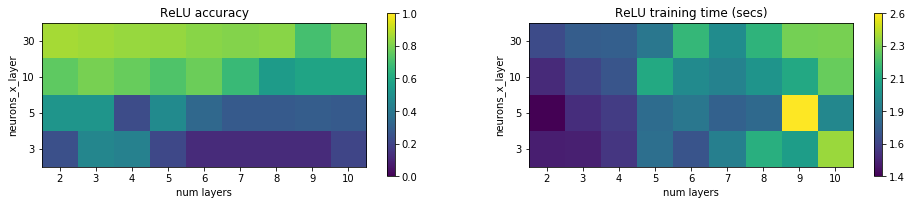

In [31]:
plot_heatmaps(r_relu, t_relu, "ReLU")

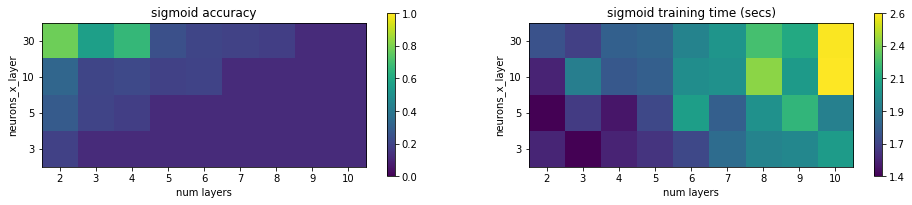

In [32]:
plot_heatmaps(r_sigm, t_sigm, "sigmoid")

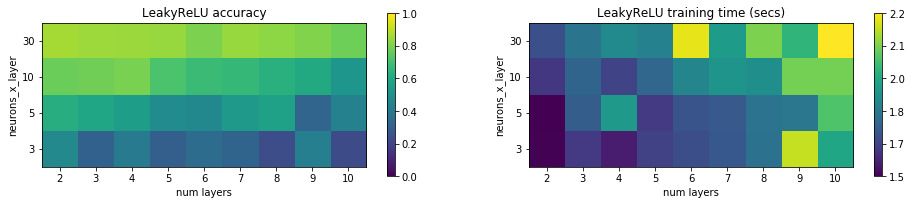

In [33]:
plot_heatmaps(r_lrelu, t_lrelu, "LeakyReLU")

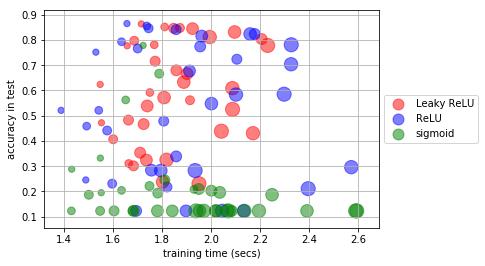

In [34]:
nlayers = np.r_[list(r_lrelu.columns)*len(r_lrelu.index)]

rl = r_lrelu.values.flatten()
tl = t_lrelu.values.flatten()
rr = r_relu.values.flatten()
tr = t_relu.values.flatten()
rs = r_sigm.values.flatten()
ts = t_sigm.values.flatten()
plt.scatter(tl, rl, color="red", alpha=.5, label="Leaky ReLU", s=nlayers*20)
plt.scatter(tr, rr, color="blue", alpha=.5, label="ReLU", s=nlayers*20)
plt.scatter(ts, rs, color="green", alpha=.5, label="sigmoid", s=nlayers*20)
plt.grid()
plt.xlabel("training time (secs)")
plt.ylabel("accuracy in test")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));


Text(0, 0.5, 'mean accuracy in test')

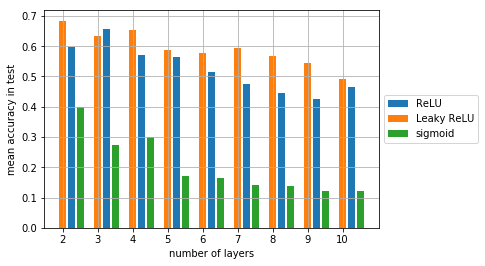

In [35]:
plt.bar(np.arange(len(r_relu.columns))+.25, r_relu.mean(axis=0), width=.2, label="ReLU")
plt.bar(np.arange(len(r_relu.columns)), r_lrelu.mean(axis=0), width=.2, label="Leaky ReLU")
plt.bar(np.arange(len(r_relu.columns))+.5, r_sigm.mean(axis=0), width=.2, label="sigmoid")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.xticks(range(len(r_relu.columns)), r_relu.columns);
plt.grid()
plt.xlabel("number of layers")
plt.ylabel("mean accuracy in test")